# Which tree species should the city plant?

## 📖 Background
You work for a nonprofit organization advising the planning department on ways to improve the quantity and quality of trees in New York City. The urban design team believes tree size (using trunk diameter as a proxy for size) and health are the most desirable characteristics of city trees.

The city would like to learn more about which tree species are the best choice to plant on the streets of Manhattan.

## 💾 The data
The team has provided access to the 2015 tree census and geographical information on New York City neighborhoods ([trees](https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh), [neighborhoods](https://data.cityofnewyork.us/City-Government/NTA-map/d3qk-pfyz)):

#### Tree Census
- "tree_id" - Unique id of each tree.
- "tree_dbh" - The diameter of the tree in inches measured at 54 inches above the ground.
- "curb_loc" - Location of the tree bed in relation to the curb. Either along the curb (OnCurb) or offset from the curb (OffsetFromCurb).
- "spc_common" - Common name for the species.
- "status" - Indicates whether the tree is alive or standing dead.
- "health" - Indication of the tree's health (Good, Fair, and Poor).
- "root_stone" - Indicates the presence of a root problem caused by paving stones in the tree bed.
- "root_grate" - Indicates the presence of a root problem caused by metal grates in the tree bed.
- "root_other" - Indicates the presence of other root problems.
- "trunk_wire" - Indicates the presence of a trunk problem caused by wires or rope wrapped around the trunk.
- "trnk_light" - Indicates the presence of a trunk problem caused by lighting installed on the tree.
- "trnk_other" - Indicates the presence of other trunk problems.
- "brch_light" - Indicates the presence of a branch problem caused by lights or wires in the branches.
- "brch_shoe" - Indicates the presence of a branch problem caused by shoes in the branches.
- "brch_other" - Indicates the presence of other branch problems.
- "postcode" - Five-digit zip code where the tree is located.
- "nta" - Neighborhood Tabulation Area (NTA) code from the 2010 US Census for the tree.
- "nta_name" - Neighborhood name.
- "latitude" - Latitude of the tree, in decimal degrees.
- "longitude" - Longitude of the tree, in decimal degrees.

#### Neighborhoods' geographical information
- "ntacode" - NTA code (matches Tree Census information).
- "ntaname" - Neighborhood name (matches Tree Census information).
- "geometry" - Polygon that defines the neighborhood.

_Tree census and neighborhood information from the City of New York [NYC Open Data](https://opendata.cityofnewyork.us/data/)._

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

trees = pd.read_csv('data/trees.csv')
trees.head(1)

,tree_id,tree_dbh,curb_loc,spc_common,status,health,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,postcode,nta,nta_name,latitude,longitude
0,190422,11,OnCurb,honeylocust,Alive,Good,No,No,No,No,No,No,No,No,No,10023,MN14,Lincoln Square,40.770046,-73.98495


In [2]:
neighborhoods = gpd.read_file('data/nta.shp')
neighborhoods.head(1)

,borocode,boroname,countyfips,ntacode,ntaname,shape_area,shape_leng,geometry
0,3.0,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,"POLYGON ((-73.94733 40.62917, -73.94687 40.626..."


## Objectives of the analysis

Create a report that covers the following:
* What are the most common tree species in Manhattan?
* Which are the neighborhoods with the most trees?
* A visualization of Manhattan's neighborhoods and tree locations.
* What ten tree species would you recommend the city plant in the future?

## What are the most common tree species in Manhattan?

In [3]:
trees_1 = trees[trees['status'] == 'Alive']
trees_1.head(4)

,tree_id,tree_dbh,curb_loc,spc_common,status,health,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,postcode,nta,nta_name,latitude,longitude
0,190422,11,OnCurb,honeylocust,Alive,Good,No,No,No,No,No,No,No,No,No,10023,MN14,Lincoln Square,40.770046,-73.984950
1,190426,11,OnCurb,honeylocust,Alive,Good,No,No,No,No,No,No,No,No,No,10023,MN14,Lincoln Square,40.770210,-73.985338
2,208649,9,OnCurb,American linden,Alive,Good,No,Yes,No,No,No,No,No,No,No,10019,MN15,Clinton,40.762724,-73.987297
3,193310,14,OnCurb,honeylocust,Alive,Good,No,No,Yes,No,No,Yes,No,No,Yes,10021,MN40,Upper East Side-Carnegie Hill,40.772171,-73.960456


In [4]:
table = pd.DataFrame({'Alive':[round(trees[trees['status']=='Alive']['status'].count())],
                      'Dead' : [round(trees[trees['status']=='Dead']['status'].count())]})
row_1=pd.DataFrame({'Alive': round(table['Alive']*100/table.sum(axis=1),2),'Dead': round(table['Dead']*100/table.sum(axis=1),2)})

table = pd.concat([table,row_1], ignore_index = True)
table.reset_index()
table.index = ['absolute number', 'share']

table

,Alive,Dead
absolute number,62427.00,1802.00
share,97.19,2.81


In [5]:
class list:
    def unique(list1):

        # initialize a null list
        unique_list = []

        # traverse for all elements
        for x in list1:
            # check if exists in unique_list or not
            if x not in unique_list:
                unique_list.append(x)
        # print list
        for x in unique_list:
            print ([x])
    

In [74]:
spc_names=trees_1['spc_common'].unique()
spc_names[0:10]

array(['honeylocust', 'American linden', 'willow oak', 'London planetree',
       'pin oak', 'American elm', 'ash', 'red maple', 'ginkgo',
       'crab apple'], dtype=object)

In [99]:
species_1 = pd.DataFrame( trees_1.groupby('spc_common')[['spc_common']].count()) 
species_1 = species_1.rename({'spc_common':'Total'}, axis=1)

species_1 = species_1.sort_values(by = 'Total',ascending = False)
species_1.head()

,Total
spc_common,
honeylocust,13175
Callery pear,7297
ginkgo,5859
pin oak,4584
Sophora,4453


In [92]:
species_2 = pd.DataFrame(trees_1[trees_1['health'] == "Good"][['spc_common','health']].groupby('spc_common').count()).sort_values(by = 'health', ascending = False)
species_2 = species_2.rename({'health':'Healthy'}, axis=1, inplace = False)

In [93]:
species_2.head()

,Healthy
spc_common,
honeylocust,10958
Callery pear,5382
ginkgo,4386
pin oak,3731
Sophora,3554


In [104]:
species_3 = trees_1[trees_1['health'] == "Fair"][['spc_common','health']].groupby('spc_common').count().sort_values(by = 'health', ascending = False)

species_3 = species_3.rename({species_3.columns[0]:'Fair'}, axis=1, inplace = False) 
species_4 = trees_1[trees_1['health'] == "Poor"][['spc_common','health']].groupby('spc_common').count().sort_values(by = 'health', ascending = False)
species_4 = species_4.rename({species_4.columns[0]:'Poor'}, axis=1, inplace = False)

species_table = pd.merge(species_1, species_2,left_on='spc_common',right_on='spc_common')
species_table = pd.merge(species_table, species_3,left_on='spc_common',right_on='spc_common')
species_table = pd.merge(species_table, species_4,left_on='spc_common',right_on='spc_common')
# species_table = pd.concat([species_table, pd.DataFrame(
#                                                     {'share_healthy': round(species_table[['Healthy']]*100/species_table[['Total']]),
#                                                     'share_fair': round(species_table[['Fair']]*100/species_table[['Total']]),
#                                                     'share_poor': round(species_table[['Poor']]*100/species_table[['Total']])})])

In [105]:
species_table

,Total,Healthy,Fair,Poor
spc_common,,,,
honeylocust,13175,10958,2012,205
Callery pear,7297,5382,1474,441
ginkgo,5859,4386,982,491
pin oak,4584,3731,719,134
Sophora,4453,3554,713,186
...,...,...,...,...
American larch,7,3,3,1
crimson king maple,6,1,2,3
Himalayan cedar,6,4,1,1


TypeError: plot got an unexpected keyword argument 'x'

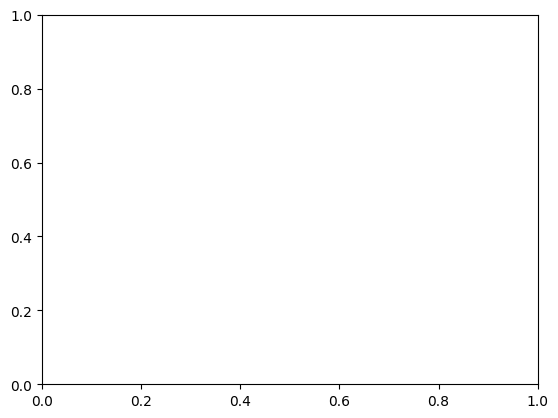

In [113]:
import matplotlib.pyplot as plt
p1 = plt.plot(data = species_2, x = species_2[['Healthy']], y = species_2.index ) 
plt.xlabs(x = '')
plt.ylabs(y = 'species' )
## 
p1

## Which are the neighborhoods with the most trees?

## A visualization of Manhattan's neighborhoods and tree locations.

In [ ]:
map1 = df1.plot(column='borocode', cmap='tab10', figsize=(15, 5), legend=True)

## Top ten recommended tree species 

## Summary

-
-
-